In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import mode

In [2]:
df=pd.read_csv(r"C:\Users\91785\Documents\GitHub\Sales_forcasstng\Pre-Processsing\sales_prediction.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
x=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape

((6818, 11), (1705, 11))

In [8]:
X_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1


In [9]:
X_train_N=X_train.copy()

In [10]:
X_train_N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 549 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5644 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4883 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


In [11]:
X_train_N.isnull().sum()

Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
int_data=X_train_N.select_dtypes(exclude=['object'])

In [13]:
int_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,9.500,0.035206,171.3448,1999
7757,18.000,0.047473,170.5422,2002
764,17.600,0.076122,111.7202,1997
6867,8.325,0.029845,41.6138,2002
2716,12.850,0.137228,155.5630,1997
...,...,...,...,...
5734,9.395,0.286345,139.1838,1998
5191,15.600,0.117575,75.6670,2007
5390,17.600,0.018944,237.3590,2002
860,20.350,0.054363,117.9466,2007


In [14]:
int_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5644.000000,6818.000000,6818.000000,6818.000000
mean,12.886347,0.066097,141.905134,1997.856850
std,4.644777,0.051429,62.547789,8.395692
min,4.555000,0.000000,31.290000,1985.000000
25%,8.880000,0.026939,94.175200,1987.000000
50%,12.600000,0.054129,144.262800,1999.000000
75%,16.850000,0.094791,186.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [15]:
object_data=X_train.select_dtypes(include=['object'])

In [16]:
object_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4883,6818,6818
unique,1555,5,16,10,3,3,4
top,FDD38,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,4035,1002,761,2233,2703,4446


In [17]:
object_data.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1935
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [18]:
X_train_N[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4416,DRA24,NaN
4900,DRA24,19.35
8371,DRA59,8.27
6057,DRA59,NaN
...,...,...
6056,NCZ42,10.50
6879,NCZ53,9.60
2084,NCZ53,NaN
1896,NCZ54,NaN


In [19]:
Item_ID_Weight=X_train.pivot_table(values='Item_Weight',index='Item_Identifier',aggfunc='median').reset_index()
Item_ID_Weight_map=dict(zip(Item_ID_Weight['Item_Identifier'],Item_ID_Weight['Item_Weight']))
Item_ID_Weight_map.items()

dict_items([('DRA12', 11.6), ('DRA24', 19.35), ('DRA59', 8.27), ('DRB01', 7.39), ('DRB13', 6.115), ('DRB24', 8.785), ('DRB25', 12.3), ('DRB48', 16.75), ('DRC01', 5.92), ('DRC12', 17.85), ('DRC13', 8.26), ('DRC24', 17.85), ('DRC25', 5.73), ('DRC27', 13.8), ('DRC36', 13.0), ('DRC49', 8.67), ('DRD01', 12.1), ('DRD12', 6.96), ('DRD13', 15.0), ('DRD15', 10.6), ('DRD24', 13.85), ('DRD25', 6.135), ('DRD27', 18.75), ('DRD37', 9.8), ('DRD49', 9.895), ('DRD60', 15.7), ('DRE01', 10.1), ('DRE03', 19.6), ('DRE12', 4.59), ('DRE13', 6.28), ('DRE15', 13.35), ('DRE25', 15.35), ('DRE27', 11.85), ('DRE37', 13.5), ('DRE48', 8.43), ('DRE49', 20.75), ('DRE60', 9.395), ('DRF01', 5.655), ('DRF03', 19.1), ('DRF13', 12.1), ('DRF15', 18.35), ('DRF23', 4.61), ('DRF25', 9.0), ('DRF27', 8.93), ('DRF36', 16.1), ('DRF37', 17.25), ('DRF48', 5.73), ('DRF49', 7.27), ('DRF51', 15.75), ('DRF60', 10.8), ('DRG01', 14.8), ('DRG03', 14.5), ('DRG11', 6.385), ('DRG13', 17.25), ('DRG15', 6.13), ('DRG23', 8.88), ('DRG25', 10.5), 

In [20]:
Item_type_Weight=X_train_N.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()

Item_type_Weight_map=dict(zip(Item_type_Weight['Item_Type'],Item_type_Weight['Item_Weight']))
Item_type_Weight_map.items()

dict_items([('Baking Goods', 11.925), ('Breads', 10.6), ('Breakfast', 10.695), ('Canned', 12.35), ('Dairy', 13.35), ('Frozen Foods', 12.85), ('Fruits and Vegetables', 12.85), ('Hard Drinks', 9.695), ('Health and Hygiene', 12.35), ('Household', 13.15), ('Meat', 12.65), ('Others', 14.5), ('Seafood', 11.65), ('Snack Foods', 12.925), ('Soft Drinks', 11.6), ('Starchy Foods', 13.5)])

In [37]:
def impute_item_weight(data_frame):
    data_frame.loc[:,'Item_Weight']= data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(Item_ID_Weight_map))
    data_frame.loc[:,'Item_Weight']= data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(Item_ID_Weight_map))
    return data_frame

In [22]:
X_train_N=impute_item_weight(X_train_N)

In [23]:
X_train_N.isnull().sum()

Item_Identifier                 0
Item_Weight                    16
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [24]:
X_train_N.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           413
Supermarket Type1  High            744
                   Medium          720
                   Small          1493
Supermarket Type2  Medium          752
Supermarket Type3  Medium          761
dtype: int64

In [25]:
df.drop(['Outlet_Size'], axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [26]:
df.corr()

C:\Users\91785\AppData\Local\Temp\ipykernel_15504\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

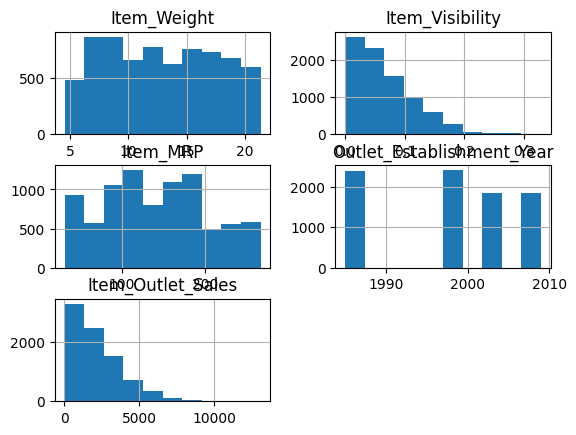

In [27]:
df.hist()

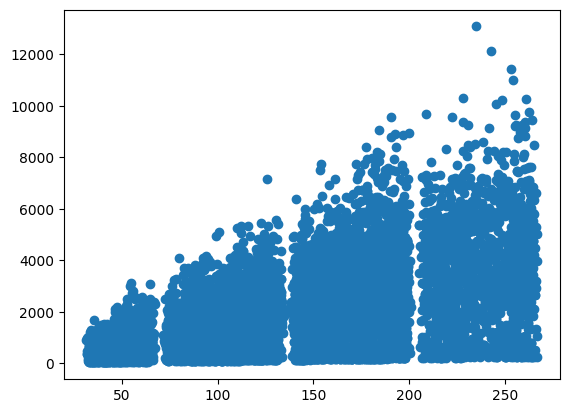

In [28]:
x=df['Item_MRP']
y=df['Item_Outlet_Sales']
plt.scatter(x,y)

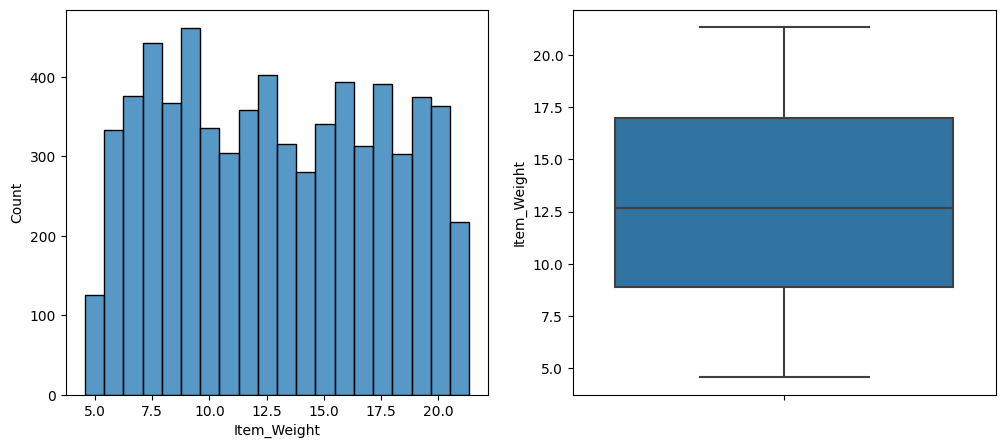

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=X_train_N,x='Item_Weight',ax=ax[0]);
sns.boxplot(data=X_train_N,y='Item_Weight',ax=ax[1]);

In [50]:
def vis_feature(data_frame,col_name):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    sns.histplot(data=data_frame,x=col_name,ax=ax[0]);
    sns.boxplot(data=data_frame,y=col_name,ax=ax[1]);

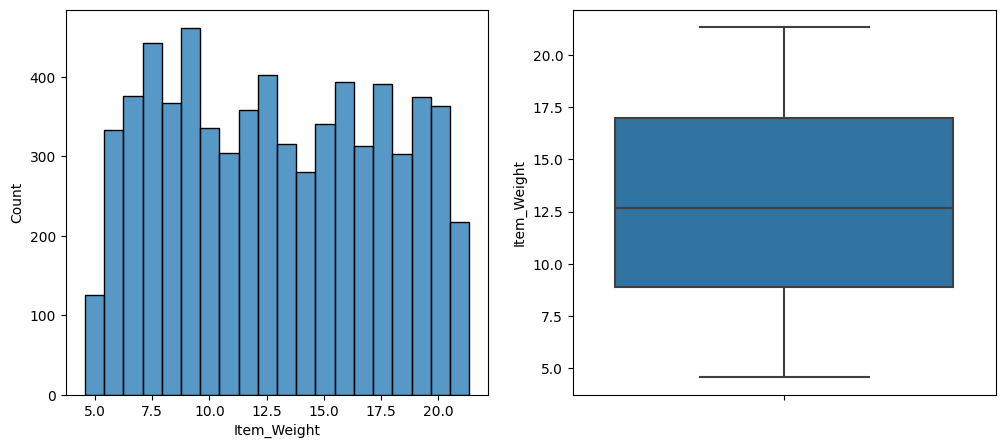

In [51]:
vis_feature(X_train_N,'Item_Weight')

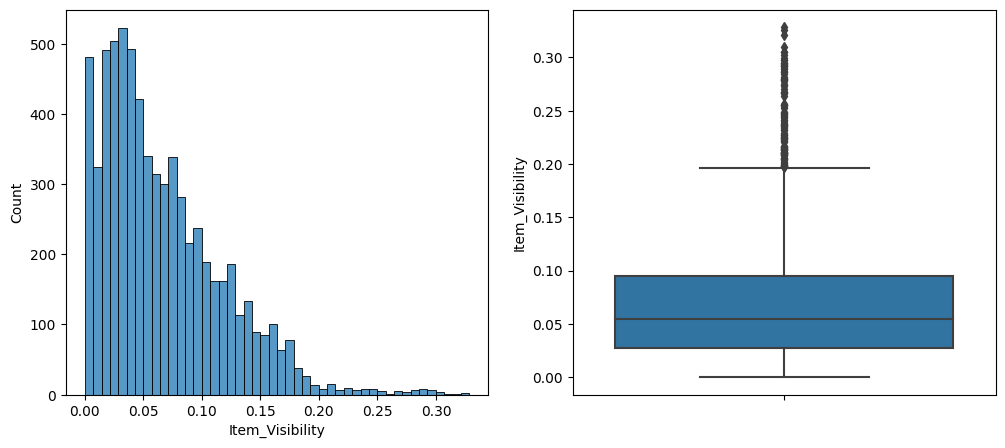

In [52]:
vis_feature(X_train_N,'Item_Visibility')

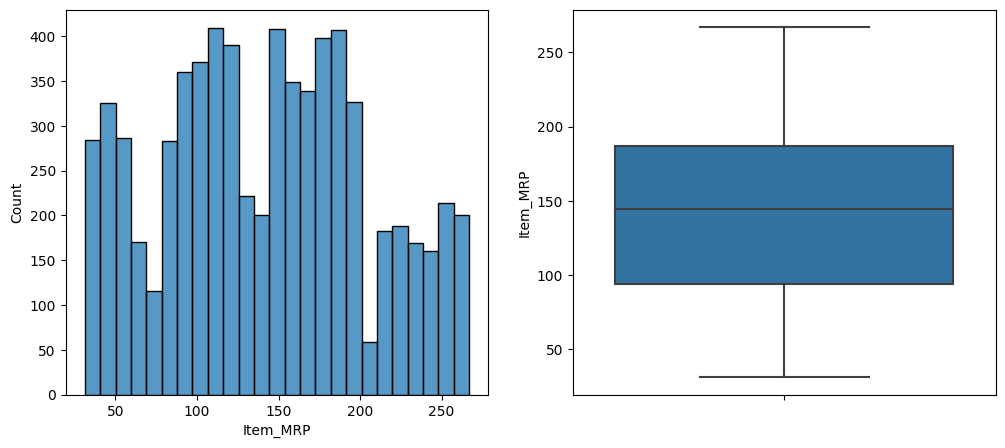

In [53]:
vis_feature(X_train_N,'Item_MRP') 

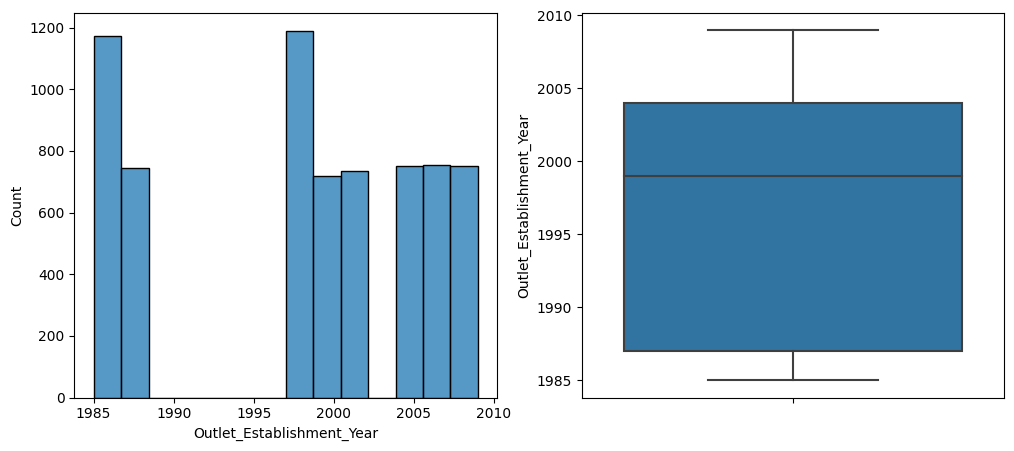

In [54]:
vis_feature(X_train_N,'Outlet_Establishment_Year') 

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

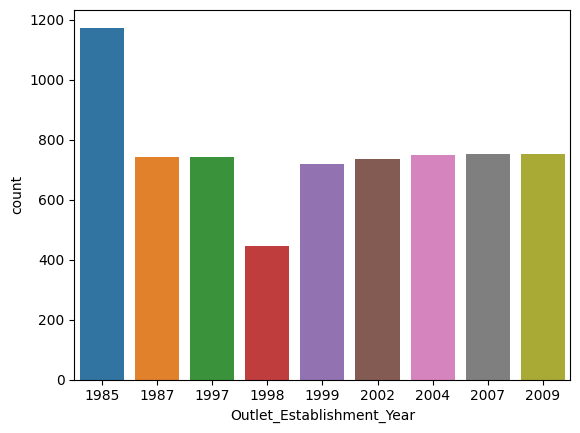

In [55]:
sns.countplot(data=X_train_N,x='Outlet_Establishment_Year')